In [2]:
import pandas as pd
import numpy as np

In [43]:
data = pd.read_excel('data.xlsx')
data.columns = data.columns.str.lower()
data.head()

,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions
0,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Retargeting,5949,41,1666.844364,0
2,Псилон,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Retargeting,191,6,40.641915,0
3,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,227,1,45.747407,0
4,Гамма,2021-04-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Retargeting,18,0,0.000000,0


#Предварительный анализ данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10478 entries, 0 to 10477
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   client                   10478 non-null  object        
 1   month                    10478 non-null  datetime64[ns]
 2   category                 10478 non-null  object        
 3   device                   10478 non-null  object        
 4   place                    10478 non-null  object        
 5   bannertype               10478 non-null  object        
 6   querytype (search only)  10478 non-null  object        
 7   targetingtype            10478 non-null  object        
 8   shows                    10478 non-null  int64         
 9   clicks                   10478 non-null  int64         
 10  cost                     10478 non-null  float64       
 11  conversions              10478 non-null  int64         
dtypes: datetime64[ns](1), float64(1)

In [7]:
data[data.duplicated(keep=False)] # Поиск дубликатов

,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions


Стоимость обращения (cost per action, CPA) отражает затраты на привлечение одного целевого действия посетителя. Этот показатель вычисляется как отношение рекламного бюджета к количеству целевых действий. В данном случае количество целевых действий представлено в столбце Conversion. Кроме того, существует связь между коэффициентом конверсии (CR) и CPA. Коэффициент конверсии (CR) определяется как отношение количества целевых действий к общему количеству действий, которое, вероятно, соответствует количеству кликов. Повышение CR приводит к уменьшению стоимости заказа или обращения.

In [44]:
#Оставляем данные только за интересующий рекламодателя период:
data['month'] = pd.to_datetime(data['month'], format="%m/%d/%Y")
data = data[(data['month'] > '2022-05-01') & (data['month'] < '2022-10-01')]

In [45]:
data.head()

,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions
1405,Дельта,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1406,Дельта,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,cpc_video,none,Phrase,0,0,0.000000,0
1407,Гамма,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Phrase,3701,10,109.619288,0
1408,Гамма,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Networks,image_ad,none,Retargeting,0,0,0.000000,0
1409,Гамма,2022-06-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Networks,image_ad,none,Phrase,120840,417,2502.669102,0


In [46]:
data.describe()

,month,shows,clicks,cost,conversions
count,2597,2.597000e+03,2.597000e+03,2.597000e+03,2597.000000
mean,2022-07-17 03:48:26.892568320,1.487777e+06,9.457833e+03,3.080921e+05,510.860993
min,2022-06-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2022-07-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,2022-08-01 00:00:00,4.168000e+03,1.150000e+02,4.616004e+03,2.000000
75%,2022-08-01 00:00:00,8.380600e+04,3.051000e+03,1.191360e+05,73.000000
max,2022-09-01 00:00:00,3.349215e+08,2.237376e+06,3.976618e+07,47259.000000
std,NaN,1.289993e+07,6.085994e+04,1.289624e+06,2207.496925


In [48]:
#Расчитаем CPA
data['cost'] = data['cost'].astype(np.float64)
cost = data['cost'].sum()
conver = data['conversions'].sum()
CPA = cost / conver
print(f'CPA = {CPA}')

CPA = 603.083980821277


In [51]:
cpa_goal = 380
print(f'Текущий CPA больше целевого на {round(CPA / cpa_goal * 100 - 100)}%')

Текущий CPA больше целевого на 59%


In [52]:
#Рассчитаем CR и CRC:
data['cr'] = data['conversions'] / data['clicks']
data['cpc'] = data['cost'] / data['clicks']

In [53]:
data[data['cost']==data['cost'].max()]

,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions,cr,cpc
6141,Псилон,2022-08-01,КРЕДИТНЫЕ КАРТЫ,Mobile,Networks,text,none,Phrase,334921472,2237376,3.976618e+07,47259,0.021123,17.773579


In [54]:
data[data['cpc']==data['cpc'].max()]

,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions,cr,cpc
1674,Омега,2022-08-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,8482,3,3589.07189,0,0.0,1196.357297


In [ ]:
data['bannertype'].unique()

array(['cpc_video', 'image_ad', 'mcbanner', 'text', 'cpm_banner',
       'dynamic'], dtype=object)

In [ ]:
data[data['cr']==data['cr'].min()].sort_values(by='cpc', ascending=False).head()

,client,month,category,device,place,bannertype,querytype (search only),targetingtype,shows,clicks,cost,conversions,cr,crc,cpc
1674,Омега,2022-08-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,8482,3,3589.071890,0,0.0,1196.357297,1196.357297
1670,Сигма,2022-08-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Mobile,Search,mcbanner,Competitor,Phrase,86,1,879.608212,0,0.0,879.608212,879.608212
1678,Псилон,2022-08-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Competitor,Phrase,4583,3,2606.679508,0,0.0,868.893169,868.893169
1668,Сигма,2022-08-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Other,Phrase,36932,58,47824.885250,0,0.0,824.566987,824.566987
1673,Омега,2022-08-01,РАСЧЕТНО-КАССОВОЕ ОБСЛУЖИВАНИЕ,Desktop,Search,mcbanner,Competitor,Phrase,2967,3,2125.106415,0,0.0,708.368805,708.368805


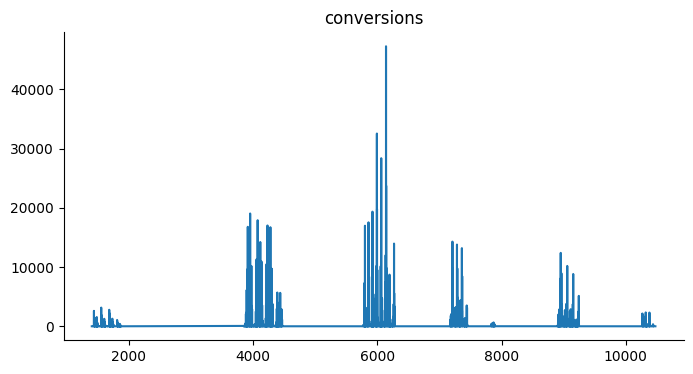

In [57]:
from matplotlib import pyplot as plt
data['conversions'].plot(kind='line', figsize=(8, 4), title='conversions')
plt.gca().spines[['top', 'right']].set_visible(False)

# Анализируем структуру расходов по параметрам "Device" (тип устройства) и "Place" (тип площадки). Для начала построим графики распределения расходов по этим параметрам за каждый месяц.

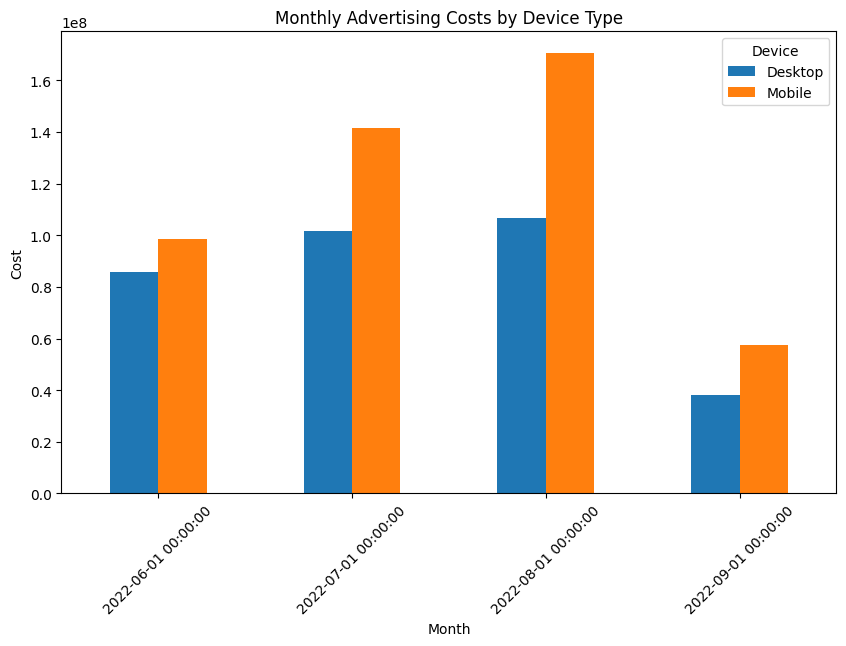

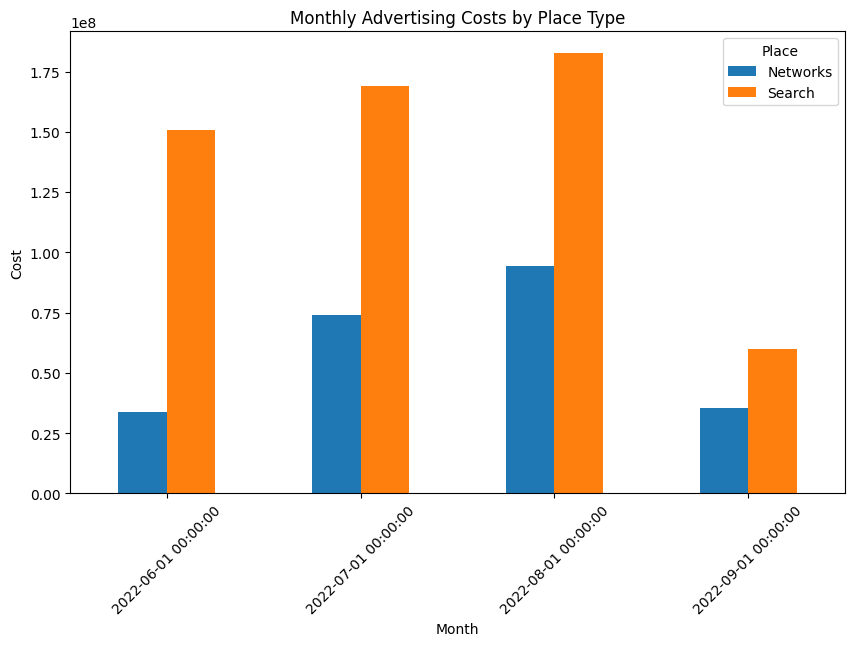

In [60]:
import matplotlib.pyplot as plt

# Группируем данные по месяцам и параметрам "Device" и "Place"
monthly_device_costs = data.groupby(['month', 'device'])['cost'].sum().unstack()
monthly_place_costs = data.groupby(['month', 'place'])['cost'].sum().unstack()

# Строим графики распределения расходов по типу устройства за каждый месяц
monthly_device_costs.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Advertising Costs by Device Type')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.legend(title='Device')
plt.show()

# Строим графики распределения расходов по типу площадки за каждый месяц
monthly_place_costs.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Advertising Costs by Place Type')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.legend(title='Place')
plt.show()

# Анализ распределения расходов по типам объявлений

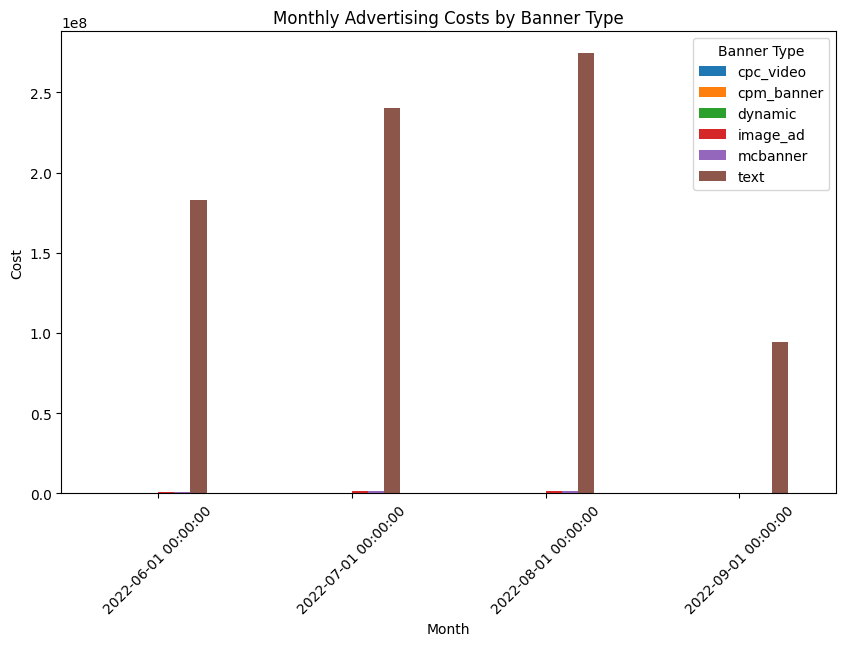

In [63]:
# Группируем данные по месяцам и типам объявлений
monthly_banner_costs = data.groupby(['month', 'bannertype'])['cost'].sum().unstack()

# Строим графики распределения расходов по типам объявлений за каждый месяц
monthly_banner_costs.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Advertising Costs by Banner Type')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.legend(title='Banner Type')
plt.show()


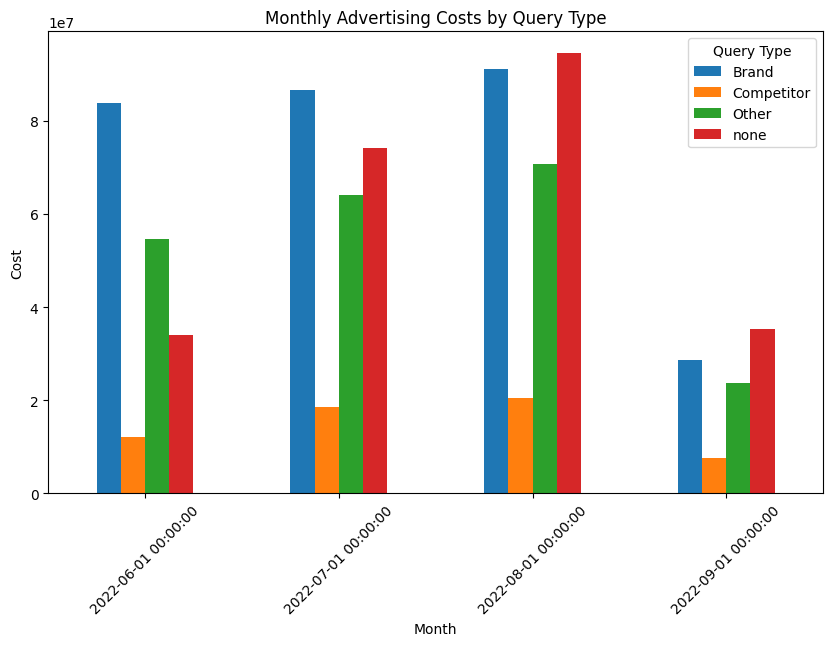

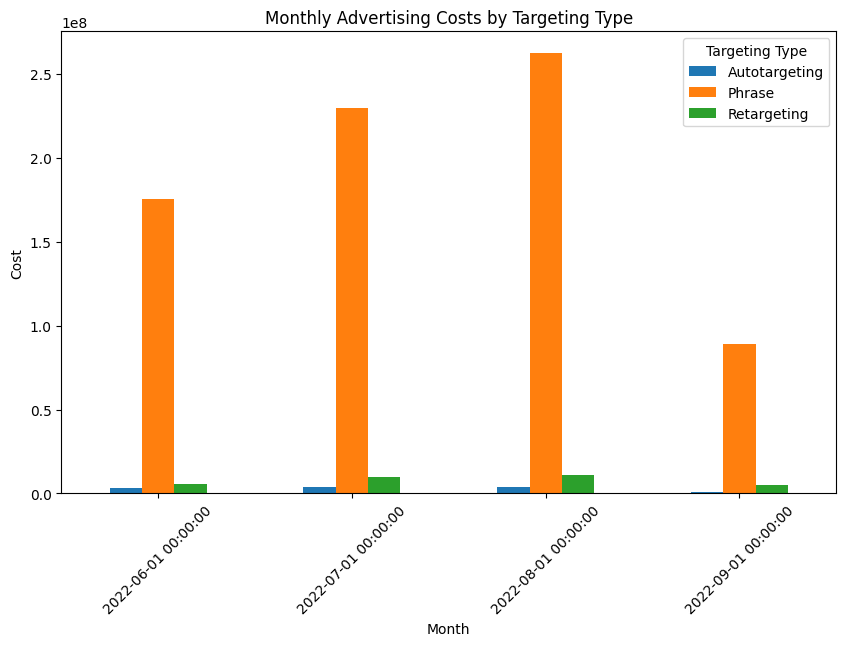

In [64]:
# Группируем данные по месяцам и типам запросов
monthly_query_costs = data.groupby(['month', 'querytype (search only)'])['cost'].sum().unstack()

# Строим графики распределения расходов по типам запросов за каждый месяц
monthly_query_costs.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Advertising Costs by Query Type')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.legend(title='Query Type')
plt.show()

# Группируем данные по месяцам и типам таргетинга
monthly_targeting_costs = data.groupby(['month', 'targetingtype'])['cost'].sum().unstack()

# Строим графики распределения расходов по типам таргетинга за каждый месяц
monthly_targeting_costs.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Advertising Costs by Targeting Type')
plt.xlabel('Month')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.legend(title='Targeting Type')
plt.show()


# Типы таргетинга "phrase" привлекают больше расходов, это может быть одним из факторов, который может влиять на рост CPA

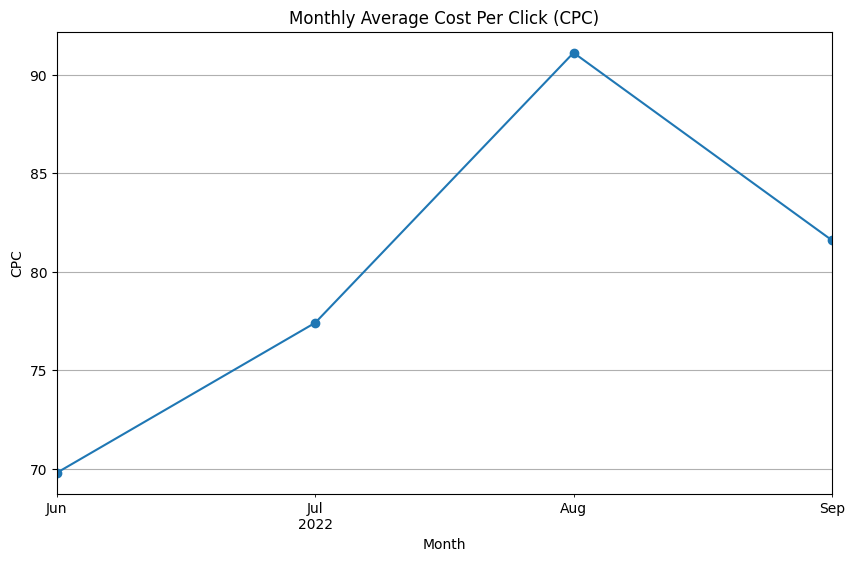

In [73]:
monthly_cpc = data.groupby(data['month'].dt.to_period('M'))['cpc'].mean()

# Строим график динамики CPC по месяцам
plt.figure(figsize=(10, 6))
monthly_cpc.plot(marker='o')
plt.title('Monthly Average Cost Per Click (CPC)')
plt.xlabel('Month')
plt.ylabel('CPC')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Возможно, есть предположение о проблеме с выбором ключевых фраз для таргетинга. В таком случае, имеет смысл внедрить минус-фразы и дополнить список ключевых фраз запросами, которые показывают высокий Click-Through Rate (CTR).